# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df=pd.read_csv('Cardiotocographic.csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
# Droping the Unwanted columns
df.drop(columns=['NSP'],inplace=True)
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000


In [4]:
df.drop(columns=['DS','DP'],inplace=True)

# EDA

In [5]:
df.describe()

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371
std,11.270154,0.004391,0.067540,0.003340,0.003343,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000
25%,126.000000,0.000000,0.000000,0.001851,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000


In [6]:
df.shape

(2126, 11)

# Data Cheaning and handiling missing values

In [7]:
df.duplicated().sum()

5

In [8]:
# Checking for the any null Values
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
dtype: int64

### We find the null valuse so we are converting them to mean values

In [9]:
df['LB'].fillna(df['LB'].mean(),inplace=True)

In [10]:
df['AC'].fillna(df['AC'].mean(),inplace=True)

In [11]:
df['MLTV'].fillna(df['MLTV'].mean(),inplace=True)

In [12]:
df['Width'].fillna(df['Width'].mean(),inplace=True)

In [13]:
df['Tendency'].fillna(df['Tendency'].mean(),inplace=True)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
# Converting the DataType of the columns to float 
df = df.astype(float)

In [16]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
dtype: object

In [17]:
df.duplicated().sum()

0

# Find Outliner

<Axes: ylabel='LB'>

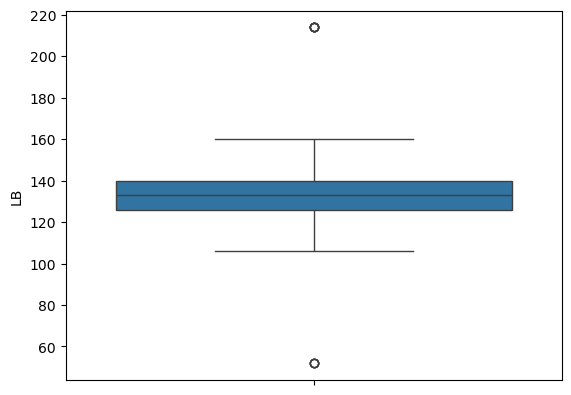

In [18]:
sb.boxplot(df['LB'])

<Axes: ylabel='AC'>

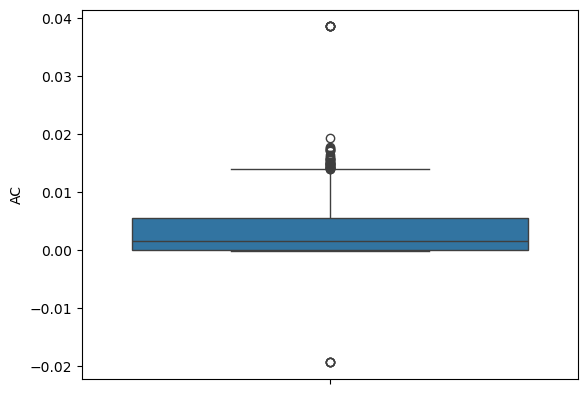

In [19]:
sb.boxplot(df['AC'])

<Axes: ylabel='FM'>

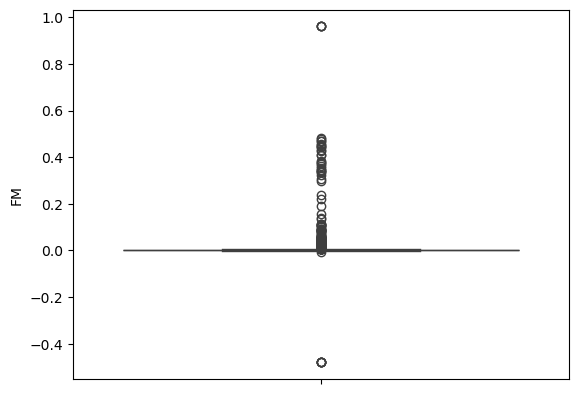

In [20]:
sb.boxplot(df['FM'])

<Axes: ylabel='UC'>

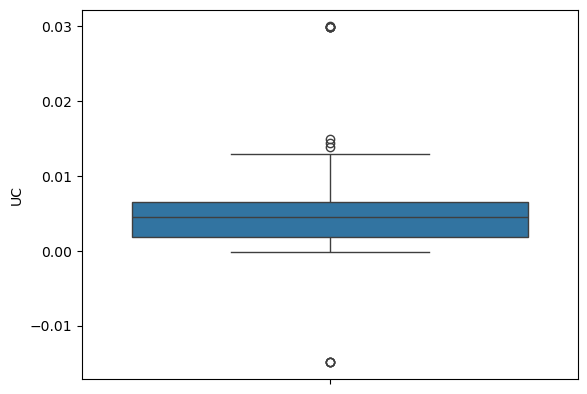

In [21]:
sb.boxplot(df['UC'])

<Axes: ylabel='DL'>

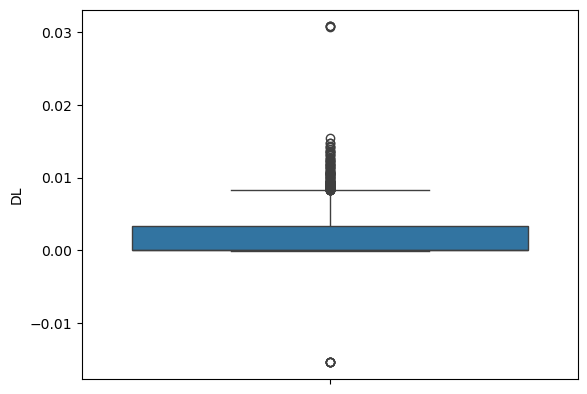

In [22]:
sb.boxplot(df['DL'])

<Axes: ylabel='ASTV'>

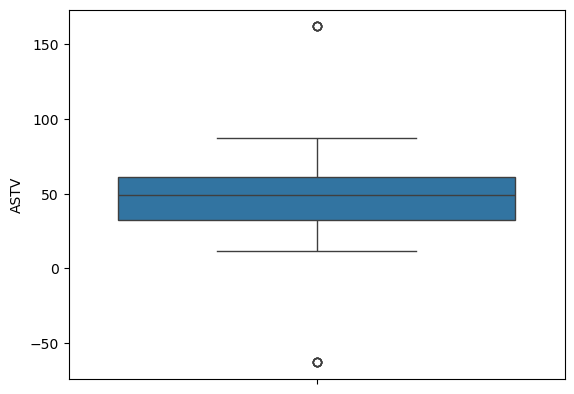

In [23]:
sb.boxplot(df['ASTV'])

<Axes: ylabel='MSTV'>

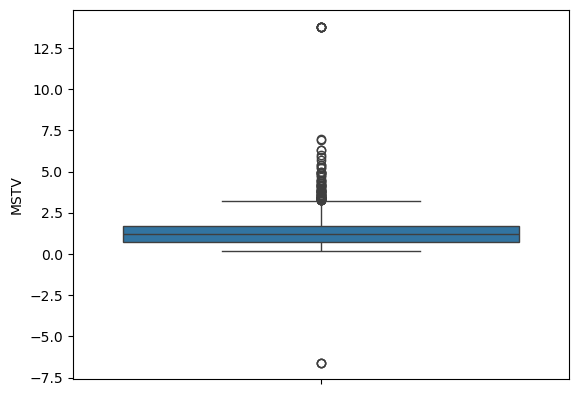

In [24]:
sb.boxplot(df['MSTV'])

<Axes: ylabel='ALTV'>

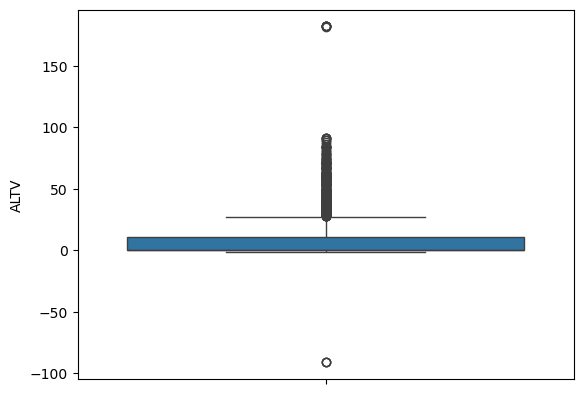

In [25]:
sb.boxplot(df['ALTV'])

<Axes: ylabel='MLTV'>

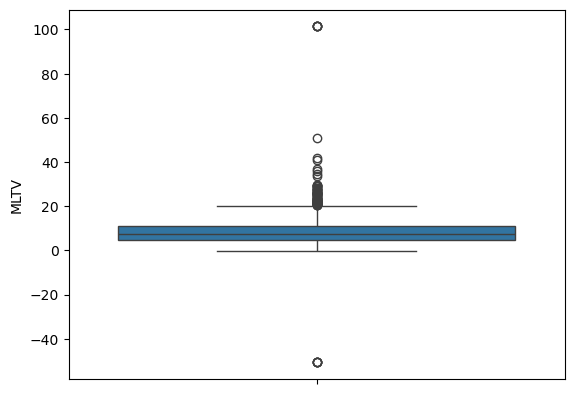

In [26]:
sb.boxplot(df['MLTV'])

<Axes: ylabel='Width'>

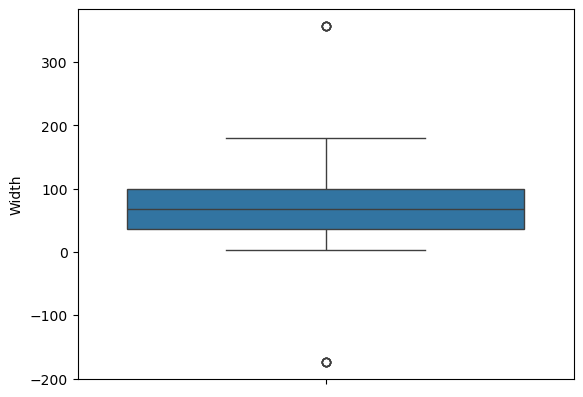

In [27]:
sb.boxplot(df['Width'])

<Axes: ylabel='Tendency'>

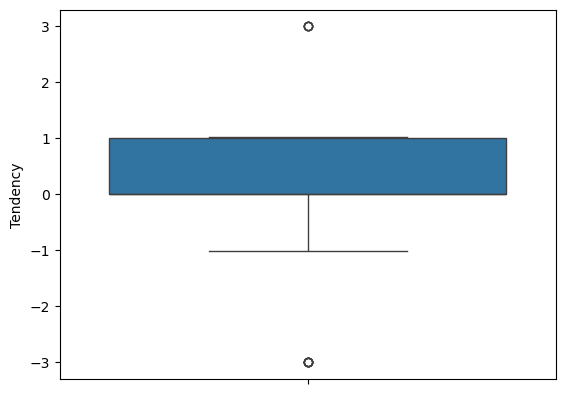

In [28]:
sb.boxplot(df['Tendency'])

# Remove outliner

In [29]:
def outlier_Detection(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df  

In [30]:
outlier_Detection(df,['LB'])

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
0,120.000000,0.000000,0.000000,0.000000,0.000000,73.0,0.5,43.000000,2.4,64.0,0.999926
1,132.000000,0.006380,0.000000,0.006380,0.003190,17.0,2.1,0.000000,10.4,130.0,0.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,16.0,2.1,0.000000,13.4,130.0,0.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,16.0,2.4,0.000000,23.0,117.0,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,16.0,2.4,0.000000,19.9,117.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,79.0,0.2,25.000000,7.2,40.0,0.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,78.0,0.4,22.000000,7.1,66.0,1.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,79.0,0.4,20.000000,6.1,67.0,1.000000
2124,140.000000,0.000679,0.000000,0.006110,0.000000,78.0,0.4,27.000000,7.0,66.0,1.000000


<Axes: ylabel='LB'>

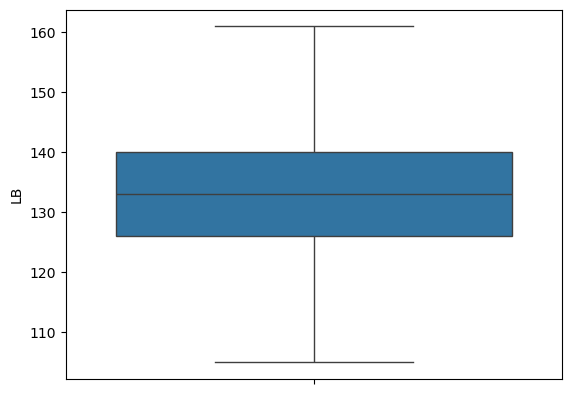

In [31]:
sb.boxplot(df['LB'])

In [32]:
outlier_Detection(df,['AC'])

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
0,120.000000,0.000000,0.000000,0.000000,0.000000,73.0,0.5,43.000000,2.4,64.0,0.999926
1,132.000000,0.006380,0.000000,0.006380,0.003190,17.0,2.1,0.000000,10.4,130.0,0.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,16.0,2.1,0.000000,13.4,130.0,0.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,16.0,2.4,0.000000,23.0,117.0,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,16.0,2.4,0.000000,19.9,117.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,79.0,0.2,25.000000,7.2,40.0,0.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,78.0,0.4,22.000000,7.1,66.0,1.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,79.0,0.4,20.000000,6.1,67.0,1.000000
2124,140.000000,0.000679,0.000000,0.006110,0.000000,78.0,0.4,27.000000,7.0,66.0,1.000000


<Axes: ylabel='AC'>

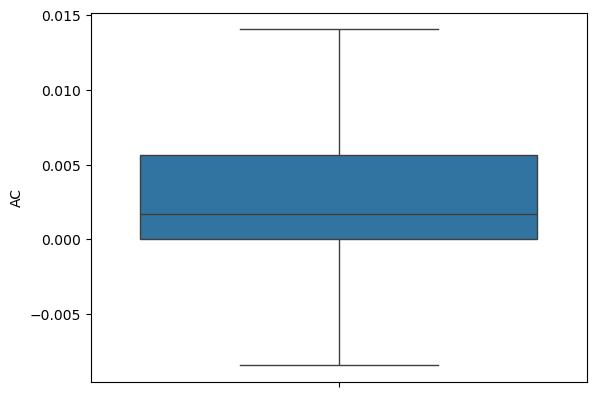

In [33]:
sb.boxplot(df['AC'])

In [34]:
outlier_Detection(df,['FM'])

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
0,120.000000,0.000000,0.000000,0.000000,0.000000,73.0,0.5,43.000000,2.4,64.0,0.999926
1,132.000000,0.006380,0.000000,0.006380,0.003190,17.0,2.1,0.000000,10.4,130.0,0.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,16.0,2.1,0.000000,13.4,130.0,0.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,16.0,2.4,0.000000,23.0,117.0,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,16.0,2.4,0.000000,19.9,117.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006418,0.007426,0.000000,79.0,0.2,25.000000,7.2,40.0,0.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,78.0,0.4,22.000000,7.1,66.0,1.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,79.0,0.4,20.000000,6.1,67.0,1.000000
2124,140.000000,0.000679,0.000000,0.006110,0.000000,78.0,0.4,27.000000,7.0,66.0,1.000000


<Axes: ylabel='FM'>

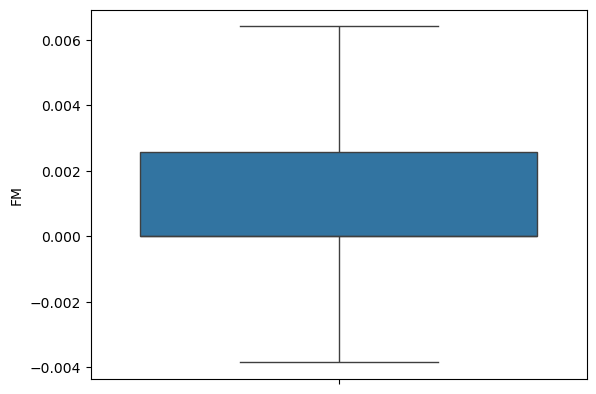

In [35]:
sb.boxplot(df['FM'])

In [36]:
outlier_Detection(df,['UC'])

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
0,120.000000,0.000000,0.000000,0.000000,0.000000,73.0,0.5,43.000000,2.4,64.0,0.999926
1,132.000000,0.006380,0.000000,0.006380,0.003190,17.0,2.1,0.000000,10.4,130.0,0.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,16.0,2.1,0.000000,13.4,130.0,0.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,16.0,2.4,0.000000,23.0,117.0,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,16.0,2.4,0.000000,19.9,117.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006418,0.007426,0.000000,79.0,0.2,25.000000,7.2,40.0,0.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,78.0,0.4,22.000000,7.1,66.0,1.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,79.0,0.4,20.000000,6.1,67.0,1.000000
2124,140.000000,0.000679,0.000000,0.006110,0.000000,78.0,0.4,27.000000,7.0,66.0,1.000000


<Axes: ylabel='UC'>

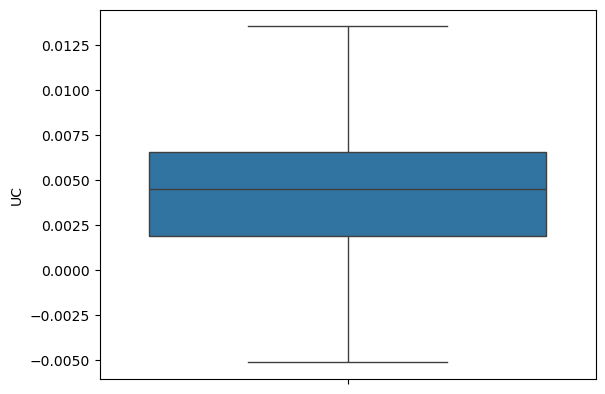

In [37]:
sb.boxplot(df['UC'])

In [38]:
outlier_Detection(df,['DL'])

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
0,120.000000,0.000000,0.000000,0.000000,0.000000,73.0,0.5,43.000000,2.4,64.0,0.999926
1,132.000000,0.006380,0.000000,0.006380,0.003190,17.0,2.1,0.000000,10.4,130.0,0.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,16.0,2.1,0.000000,13.4,130.0,0.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,16.0,2.4,0.000000,23.0,117.0,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,16.0,2.4,0.000000,19.9,117.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006418,0.007426,0.000000,79.0,0.2,25.000000,7.2,40.0,0.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,78.0,0.4,22.000000,7.1,66.0,1.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,79.0,0.4,20.000000,6.1,67.0,1.000000
2124,140.000000,0.000679,0.000000,0.006110,0.000000,78.0,0.4,27.000000,7.0,66.0,1.000000


<Axes: ylabel='DL'>

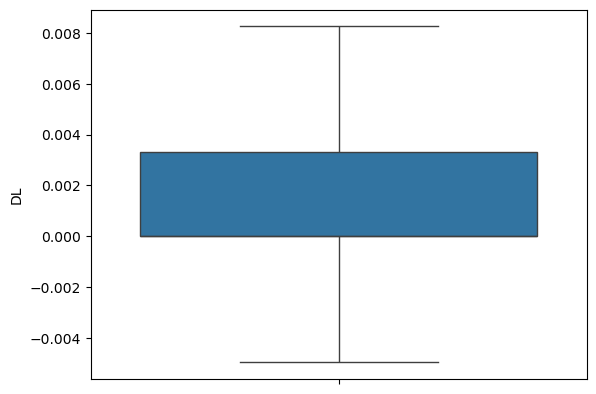

In [39]:
sb.boxplot(df['DL'])

In [40]:
outlier_Detection(df,['ASTV'])

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
0,120.000000,0.000000,0.000000,0.000000,0.000000,73.0,0.5,43.000000,2.4,64.0,0.999926
1,132.000000,0.006380,0.000000,0.006380,0.003190,17.0,2.1,0.000000,10.4,130.0,0.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,16.0,2.1,0.000000,13.4,130.0,0.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,16.0,2.4,0.000000,23.0,117.0,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,16.0,2.4,0.000000,19.9,117.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006418,0.007426,0.000000,79.0,0.2,25.000000,7.2,40.0,0.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,78.0,0.4,22.000000,7.1,66.0,1.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,79.0,0.4,20.000000,6.1,67.0,1.000000
2124,140.000000,0.000679,0.000000,0.006110,0.000000,78.0,0.4,27.000000,7.0,66.0,1.000000


<Axes: ylabel='ASTV'>

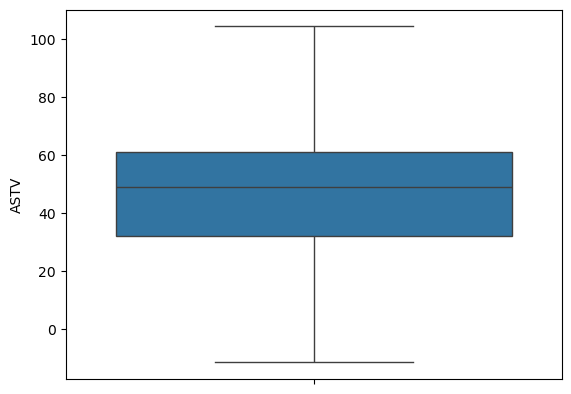

In [41]:
sb.boxplot(df['ASTV'])

In [42]:
outlier_Detection(df,['MSTV'])

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
0,120.000000,0.000000,0.000000,0.000000,0.000000,73.0,0.5,43.000000,2.4,64.0,0.999926
1,132.000000,0.006380,0.000000,0.006380,0.003190,17.0,2.1,0.000000,10.4,130.0,0.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,16.0,2.1,0.000000,13.4,130.0,0.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,16.0,2.4,0.000000,23.0,117.0,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,16.0,2.4,0.000000,19.9,117.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006418,0.007426,0.000000,79.0,0.2,25.000000,7.2,40.0,0.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,78.0,0.4,22.000000,7.1,66.0,1.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,79.0,0.4,20.000000,6.1,67.0,1.000000
2124,140.000000,0.000679,0.000000,0.006110,0.000000,78.0,0.4,27.000000,7.0,66.0,1.000000


<Axes: ylabel='MSTV'>

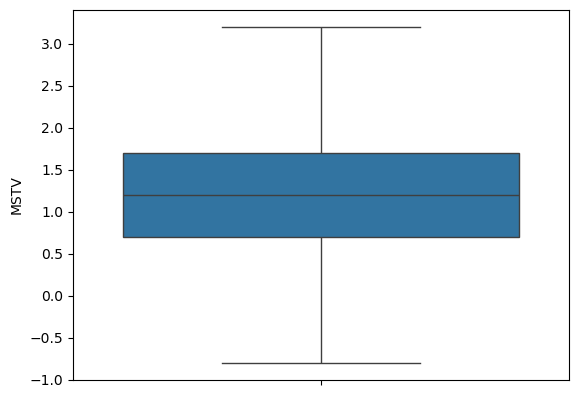

In [43]:
sb.boxplot(df['MSTV'])

In [44]:
outlier_Detection(df,['ALTV'])

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
0,120.000000,0.000000,0.000000,0.000000,0.000000,73.0,0.5,27.5,2.4,64.0,0.999926
1,132.000000,0.006380,0.000000,0.006380,0.003190,17.0,2.1,0.0,10.4,130.0,0.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,16.0,2.1,0.0,13.4,130.0,0.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,16.0,2.4,0.0,23.0,117.0,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,16.0,2.4,0.0,19.9,117.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006418,0.007426,0.000000,79.0,0.2,25.0,7.2,40.0,0.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,78.0,0.4,22.0,7.1,66.0,1.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,79.0,0.4,20.0,6.1,67.0,1.000000
2124,140.000000,0.000679,0.000000,0.006110,0.000000,78.0,0.4,27.0,7.0,66.0,1.000000


<Axes: ylabel='ALTV'>

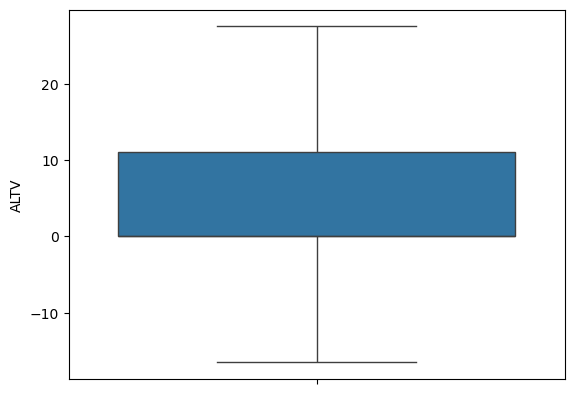

In [45]:
sb.boxplot(df['ALTV'])

In [46]:
outlier_Detection(df,['MLTV'])

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
0,120.000000,0.000000,0.000000,0.000000,0.000000,73.0,0.5,27.5,2.4,64.0,0.999926
1,132.000000,0.006380,0.000000,0.006380,0.003190,17.0,2.1,0.0,10.4,130.0,0.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,16.0,2.1,0.0,13.4,130.0,0.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,16.0,2.4,0.0,20.1,117.0,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,16.0,2.4,0.0,19.9,117.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006418,0.007426,0.000000,79.0,0.2,25.0,7.2,40.0,0.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,78.0,0.4,22.0,7.1,66.0,1.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,79.0,0.4,20.0,6.1,67.0,1.000000
2124,140.000000,0.000679,0.000000,0.006110,0.000000,78.0,0.4,27.0,7.0,66.0,1.000000


<Axes: ylabel='MLTV'>

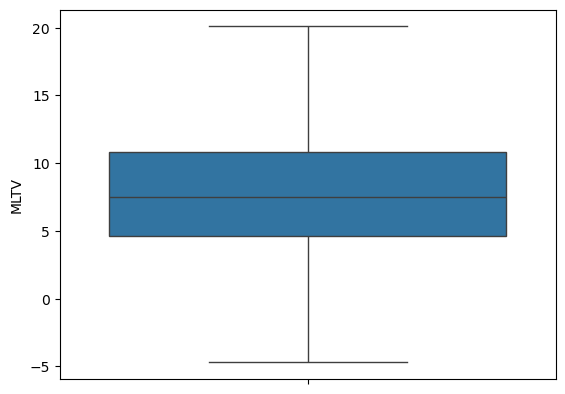

In [47]:
sb.boxplot(df['MLTV'])

In [48]:
outlier_Detection(df,['Width'])

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
0,120.000000,0.000000,0.000000,0.000000,0.000000,73.0,0.5,27.5,2.4,64.0,0.999926
1,132.000000,0.006380,0.000000,0.006380,0.003190,17.0,2.1,0.0,10.4,130.0,0.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,16.0,2.1,0.0,13.4,130.0,0.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,16.0,2.4,0.0,20.1,117.0,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,16.0,2.4,0.0,19.9,117.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006418,0.007426,0.000000,79.0,0.2,25.0,7.2,40.0,0.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,78.0,0.4,22.0,7.1,66.0,1.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,79.0,0.4,20.0,6.1,67.0,1.000000
2124,140.000000,0.000679,0.000000,0.006110,0.000000,78.0,0.4,27.0,7.0,66.0,1.000000


<Axes: ylabel='Width'>

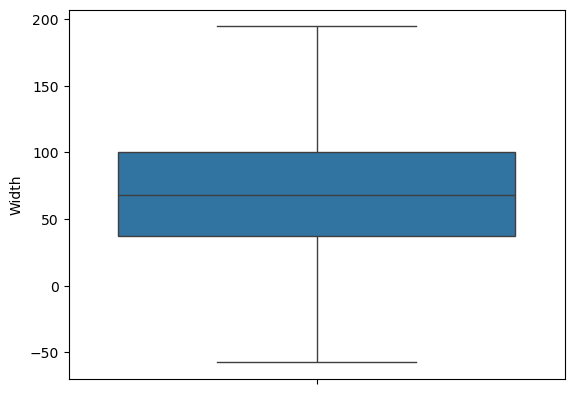

In [49]:
sb.boxplot(df['Width'])

In [50]:
outlier_Detection(df,['Tendency'])

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
0,120.000000,0.000000,0.000000,0.000000,0.000000,73.0,0.5,27.5,2.4,64.0,0.999926
1,132.000000,0.006380,0.000000,0.006380,0.003190,17.0,2.1,0.0,10.4,130.0,0.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,16.0,2.1,0.0,13.4,130.0,0.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,16.0,2.4,0.0,20.1,117.0,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,16.0,2.4,0.0,19.9,117.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006418,0.007426,0.000000,79.0,0.2,25.0,7.2,40.0,0.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,78.0,0.4,22.0,7.1,66.0,1.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,79.0,0.4,20.0,6.1,67.0,1.000000
2124,140.000000,0.000679,0.000000,0.006110,0.000000,78.0,0.4,27.0,7.0,66.0,1.000000


<Axes: ylabel='Tendency'>

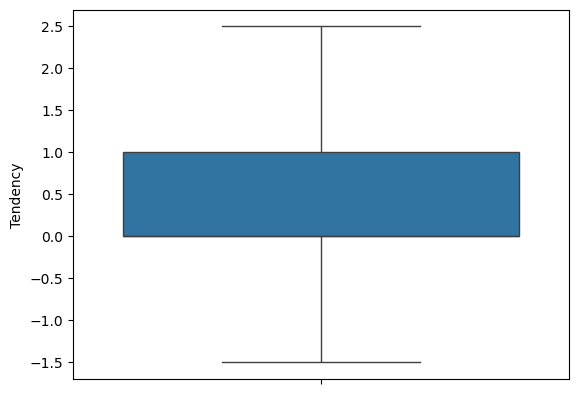

In [51]:
sb.boxplot(df['Tendency'])

# Statistical Summary:

In [52]:
# Finding the mean of the every single columns from the dataset
df.mean()

LB          133.280273
AC            0.003153
FM            0.001569
UC            0.004370
DL            0.001776
ASTV         46.974758
MSTV          1.305740
ALTV          6.668556
MLTV          8.010875
Width        70.355308
Tendency      0.319001
dtype: float64

In [53]:
# Finding the median of the every single columns from the dataset
df.median()

LB          133.000000
AC            0.001675
FM            0.000000
UC            0.004505
DL            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.500000
Width        68.000000
Tendency      0.000000
dtype: float64

In [54]:
# Finding the standard devation  of the every single columns from the dataset
df.std()

LB           9.927135
AC           0.003829
FM           0.002485
UC           0.002998
DL           0.002674
ASTV        17.607594
MSTV         0.781217
ALTV        10.359041
MLTV         5.049703
Width       39.587888
Tendency     0.621731
dtype: float64

In [55]:
#  FOR IQR
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
iqr=Q3-Q1 
iqr


LB          14.000000
AC           0.005618
FM           0.002567
UC           0.004662
DL           0.003300
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.200000
Width       63.000000
Tendency     1.000000
dtype: float64

In [56]:
df.describe()

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,133.280273,0.003153,0.001569,0.004370,0.001776,46.974758,1.305740,6.668556,8.010875,70.355308,0.319001
std,9.927135,0.003829,0.002485,0.002998,0.002674,17.607594,0.781217,10.359041,5.049703,39.587888,0.621731
min,105.000000,-0.008427,-0.003851,-0.005118,-0.004950,-11.500000,-0.800000,-16.500000,-4.700000,-57.500000,-1.500000
25%,126.000000,0.000000,0.000000,0.001874,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000
50%,133.000000,0.001675,0.000000,0.004505,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000
75%,140.000000,0.005618,0.002567,0.006536,0.003300,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000
max,161.000000,0.014045,0.006418,0.013528,0.008251,104.500000,3.200000,27.500000,20.100000,194.500000,2.500000


# Data Visualization:

<Figure size 1500x500 with 0 Axes>

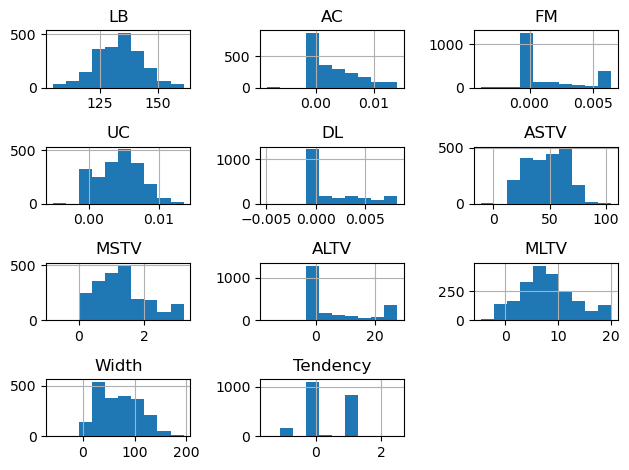

In [57]:
# histogram
plt.figure(figsize=(15,5))
df.hist()
plt.tight_layout()

Text(0, 0.5, 'AC')

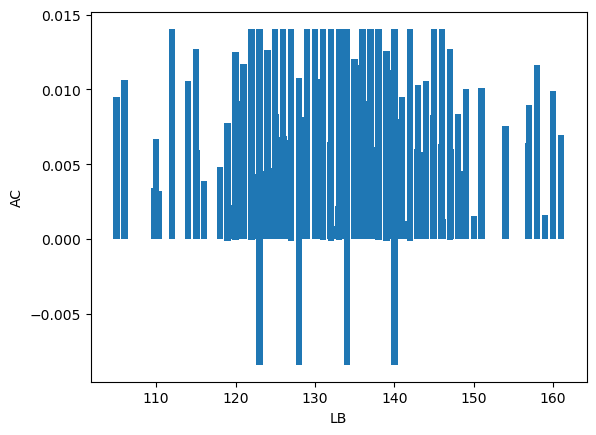

In [58]:
# Barplot
plt.bar(df['LB'],df['AC'])
plt.xlabel('LB')
plt.ylabel('AC')

Text(0, 0.5, 'AC')

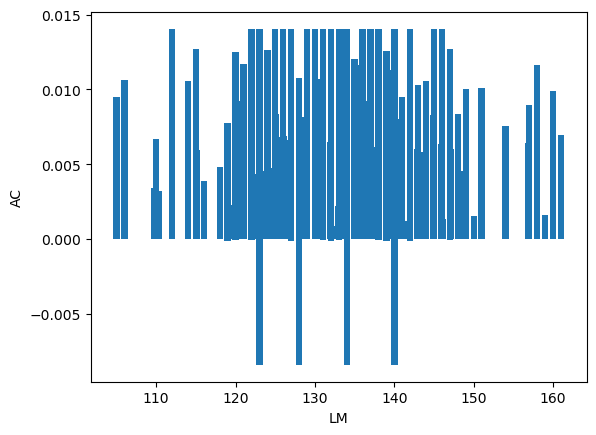

In [59]:
plt.bar(df['LB'],df['AC'])
plt.xlabel('LM')
plt.ylabel('AC')

<Axes: >

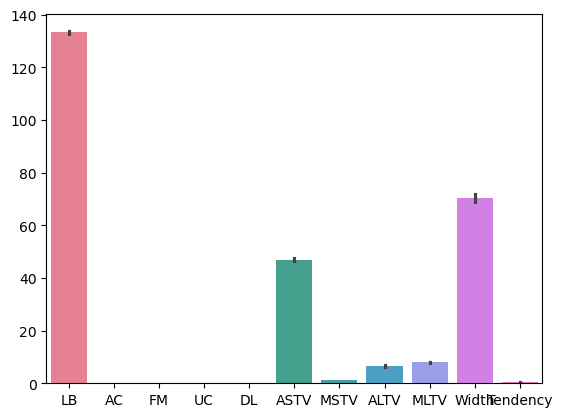

In [60]:
sb.barplot(df)

<Axes: >

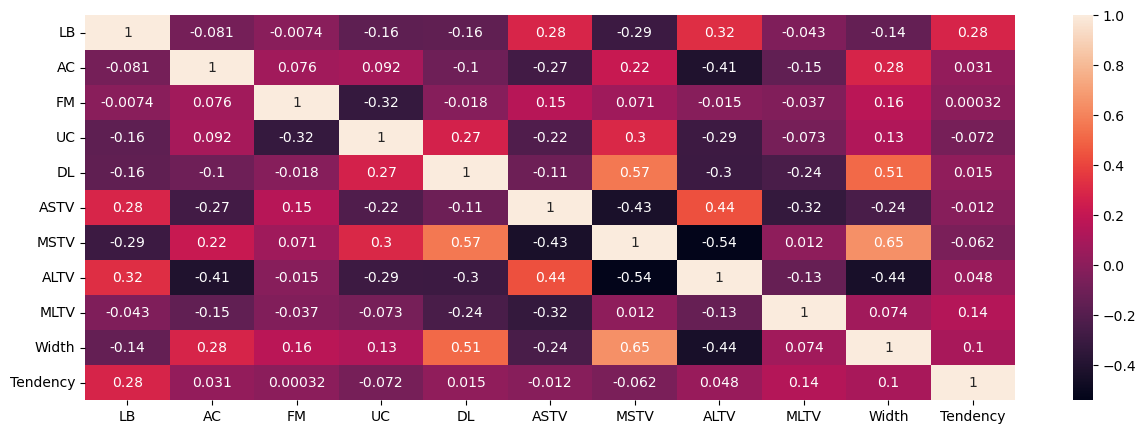

In [61]:
# heat map of correlation
plt.figure(figsize=(15,5))
sb.heatmap(df.corr(),annot=True)

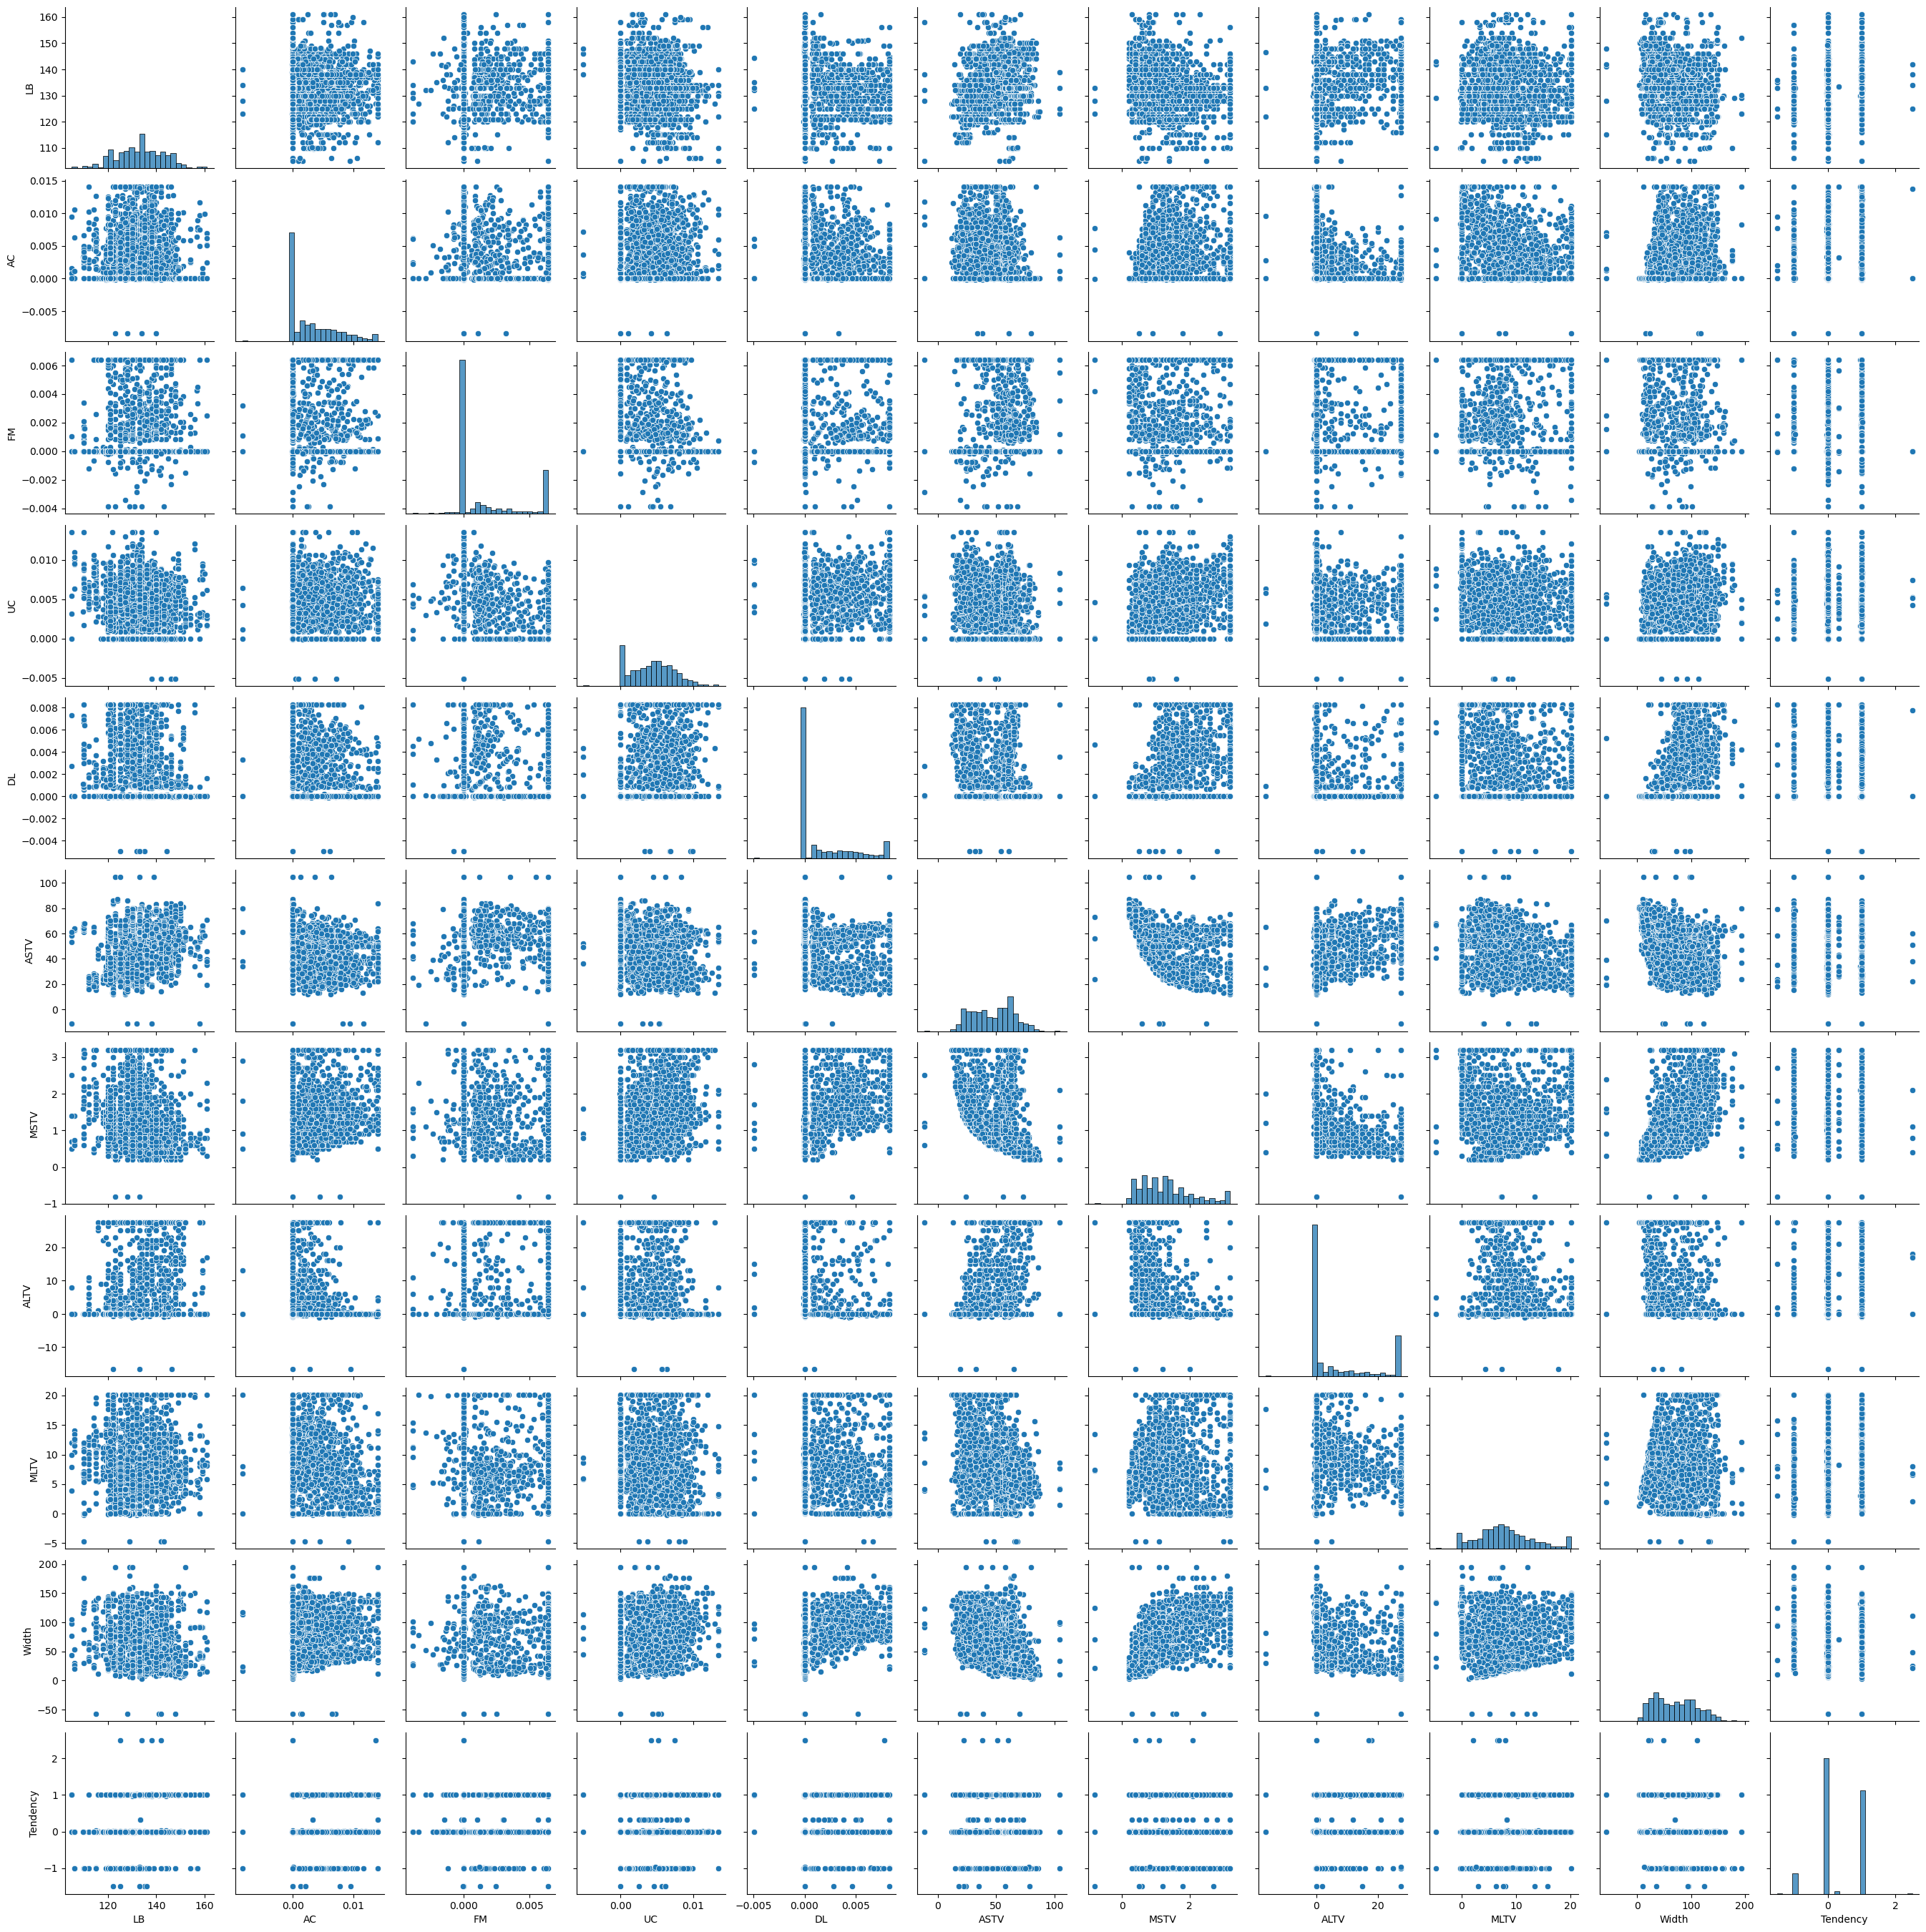

In [62]:
# Pairplot
sb.pairplot(df)

In [63]:
df

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
0,120.000000,0.000000,0.000000,0.000000,0.000000,73.0,0.5,27.5,2.4,64.0,0.999926
1,132.000000,0.006380,0.000000,0.006380,0.003190,17.0,2.1,0.0,10.4,130.0,0.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,16.0,2.1,0.0,13.4,130.0,0.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,16.0,2.4,0.0,20.1,117.0,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,16.0,2.4,0.0,19.9,117.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006418,0.007426,0.000000,79.0,0.2,25.0,7.2,40.0,0.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,78.0,0.4,22.0,7.1,66.0,1.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,79.0,0.4,20.0,6.1,67.0,1.000000
2124,140.000000,0.000679,0.000000,0.006110,0.000000,78.0,0.4,27.0,7.0,66.0,1.000000


In [64]:
df.corr()

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
LB,1.000000,-0.080759,-0.007384,-0.162098,-0.155640,0.284779,-0.294159,0.321484,-0.042572,-0.139688,0.280480
AC,-0.080759,1.000000,0.076481,0.092161,-0.103897,-0.272411,0.216969,-0.408806,-0.152019,0.283945,0.030668
FM,-0.007384,0.076481,1.000000,-0.318380,-0.017832,0.154987,0.070992,-0.014520,-0.036892,0.164111,0.000320
UC,-0.162098,0.092161,-0.318380,1.000000,0.267287,-0.216094,0.297104,-0.291679,-0.072844,0.131441,-0.072364
DL,-0.155640,-0.103897,-0.017832,0.267287,1.000000,-0.111375,0.566193,-0.295358,-0.242278,0.514511,0.015419
ASTV,0.284779,-0.272411,0.154987,-0.216094,-0.111375,1.000000,-0.432969,0.437727,-0.324569,-0.242729,-0.011763
MSTV,-0.294159,0.216969,0.070992,0.297104,0.566193,-0.432969,1.000000,-0.540232,0.011523,0.647201,-0.061518
ALTV,0.321484,-0.408806,-0.014520,-0.291679,-0.295358,0.437727,-0.540232,1.000000,-0.133887,-0.441202,0.047623
MLTV,-0.042572,-0.152019,-0.036892,-0.072844,-0.242278,-0.324569,0.011523,-0.133887,1.000000,0.073566,0.142283
Width,-0.139688,0.283945,0.164111,0.131441,0.514511,-0.242729,0.647201,-0.441202,0.073566,1.000000,0.101202


# Pattern Recogination and Insight

In [65]:
# calculate the correlation matrix
correlation_matrix = df.corr

In [66]:
# Display the correlation matrix
correlation_matrix

<bound method DataFrame.corr of               LB        AC        FM        UC        DL  ASTV  MSTV  ALTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  73.0   0.5  27.5   
1     132.000000  0.006380  0.000000  0.006380  0.003190  17.0   2.1   0.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  16.0   2.1   0.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  16.0   2.4   0.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  16.0   2.4   0.0   
...          ...       ...       ...       ...       ...   ...   ...   ...   
2121  140.000000  0.000000  0.006418  0.007426  0.000000  79.0   0.2  25.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  78.0   0.4  22.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  79.0   0.4  20.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  78.0   0.4  27.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  74.0   0.4  27.5   

      MLTV  Width  Tendency  
0

# conclusion

1. *Correlations*: Strong relationships (e.g., ads & sales) suggest that one affects the other.  
   - *Impact*: Focus on key drivers (e.g., increase ad spend to boost sales).  
   - *Next Step*: Test relationships with regression models.

2. *Trends Over Time*: Patterns (e.g., seasonal sales) help predict future behavior.  
   - *Impact*: Plan ahead for peak periods (e.g., stock up for holidays).  
   - *Next Step*: Use forecasting to predict future trends.

3. *Outliers*: Unusual data points can reveal mistakes or opportunities (e.g., a big sales spike).  
   - *Impact*: Fix errors, or capitalize on unique events.  
   - *Next Step*: Investigate causes and replicate if beneficial.

4. *Important Predictors*: Some factors (e.g., customer satisfaction) impact outcomes more than others.  
   - *Impact*: Prioritize improvements on key factors.  
   - *Next Step*: Use regression to measure impact.

5. *Segmenting Data*: Breaking data into groups (e.g., age, region) shows different behaviors.  
   - *Impact*: Tailor strategies to specific groups (e.g., promotions for younger customers).  
   - *Next Step*: Segment and target specific groups.

6. *Redundant Variables*: Similar variables (e.g., TV and online ads) may overlap.  
   - *Impact*: Simplify models by removing duplicates.  
   - *Next Step*: Identify and remove redundant features